# Introduction to Shortest Path and Pathfinding
### Designed by Eric Ianni

### Pre-requisits
* Knowledge of how to use a Jupyter Notebook
* Knowledge of basic Python and the use of multi-dimensional arrays
* Knowledge of basic weighted graphs

### Let's Paint a Picture!

Imagine you are a playing a turn-based computer game where you have a limited number of movement points per turn. Your task is to start at the village inthe top left and make it to the chest in the castle as quickly as possible without moving diagnolly.

![Castle image](./images/castle_map.png)

To you, as a human, it is very easy to see that the only clear path is around the North of the castle, back down the East and across the bridges in the South.  You are able to process the entire map at once and quickly identify dead ends.

To a computer this task isn't that easy. Computers are limited in how much of the "big picture" they can see and have to approach problems in single steps at a time. 

Now imagine you are told that it is possible to cross water tiles, but there is a movement penalty. All of a sudden the task isn't so easy as you have to consider if swimming the moat is faster than the long way. Still, you can probably figure out that crossing the one water tile to the South-West is probably the fastest route.

Now imagine it is possible to climb the castle walls, but with a stiff movement penalty. Can you still confidently say for sure you know the fastest path without sitting down and doing the math for multiple different routes?

In this latest scenario you find yourself approaching the problem how a computer  does!

### Welcome to Pathfinding!

In this module you will learn about how computers solve the _Shortest Path Problem_ by using different _Pathfinding_ algorithms. We will begin by examining real world problems that require a shortest path. Next, we will learn to frame those problems as graphs so we can apply different algorithms. Finally, we will examine these algorithms and how each approach the problem differently. 

### Learning Objectives

* Define the _Shortest Path Problem_ and give examples
* Describe _Depth First Search_ and _Breadth First Search_ while citing the differences and the required data structures
* Describe Dijkstra's algorithm and implement
* Describe the A* algorithm and implement

## What is Pathfinding?
The simplest definition of _pathfinding_ is finding a route (_path_) between points *A* and *B*. We do this all the time everyday of our lives. When driving to the store we have to pick which streets to follow to get there. Even the simple act of crossing a room is an act of selecting a route, even more so if you have children leaving toys on the ground!

While you or I use our eyes and intuition for many _pathfinding_ tasks, computers must rely on other approaches. Most computational _pathfinding_ makes heavy use of _graphy theory_. This involves defining the given situation as a _graph_: a series of nodes and edges. 

To demonstrate this process, let's imagine a bus-network between a few cities: New York City, Boston, Washington D.C., Columbus, and Chicago. To represent the network, we begin by designating each city a _vertex_ in the graph. We then create an _edge_ between vertices to mirror the bus-routes. Finally we can assign the number of miles between the cities as the edge _weights_.

![City Graph](./images/city_graph.png)

Now that we have learned how to frame a problem in a way for computers to understand, it is time to actually find a path.

## Introducing Twiddle Dee and Twiddle Dumb

The first two algorithms we are going to examine are _Depth First Search_ (DFS) and _Breadth First Search_ (BFS). These two methods are what I would call _dumb_ in that they are brute force approaches to the problem of _pathfinding_. 

They get their name from how they search through _tree graphs_. DFS searches down a single branch until it reaches a leaf before it backtracks. BFS, on the other hand, searches each child node before moving onto lower levels of the tree.  

![DFS vs. BFS in Binary Trees](./images/binary_tree_search.png)(image borrowed from http://mishadoff.com/blog/dfs-on-binary-tree-array/)

When not being used for _pathfinding_, DFS and BFS return a list of nodes in the order in which they were visited/searched. Given the binary-trees above:

* DFS would return **[0,1,3,4,2,5,6]** 
* BFS would return **[0,1,2,3,4,5,6]**

## Let's see these two in action!

For this section we are going to be using the following graph.

![DFS & BFS Graph](./images/dfs_bfs_graph.png)
(Image borrowed from https://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/)

Below you will find two code snippets that implement DFS and BFS. You will be able to run these algorithms with different parameters to get a feel for how each search works. 

Begin by simply running the cells (ctrl-enter) and trying different values for the starting node and the goal node. Try the same values for start and goal for each algorithm. 

After you have experimented, try to answer the following questions:

1. Why don't DFS and BFS come up with the same path?
2. Why does BFS seem to be able to find shorter paths than DFS? (look at start: 'A' and goal: 'C')
3. What does that mean for the value for each of these searches?

Now go have fun!

### Depth First Search Playground

In [12]:
# Code modified from https://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/

graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}
            
def dfs(graph, start, goal):
    steps = 0
    stack = [(start, [start])]
    while stack:
        steps += 1
        (vertex, path) = stack.pop()
        if vertex == goal:
            return path, steps
        for next in graph[vertex] - set(path):
            stack.append((next, path + [next]))

start = input("Enter Starting Node: ")            
goal = input("Enter Goal Node: ")
path, steps = dfs(graph, start, goal)
print("Path: " + str(path) + " Steps: " + str(steps))

Enter Starting Node: A
Enter Goal Node: D
Path: ['A', 'C', 'F', 'E', 'B', 'D'] Steps: 6


### Breath First Search Playground

In [13]:
# Code modified from https://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/

graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

def bfs(graph, start, goal):
    steps = 0
    queue = [(start, [start])]
    while queue:
        steps += 1
        (vertex, path) = queue.pop(0)
        if vertex == goal:
            return path, steps
        for next in graph[vertex] - set(path):
            queue.append((next, path + [next]))

start = input("Enter Starting Node: ")            
goal = input("Enter Goal Node: ")
path, steps = bfs(graph, start, goal)
print("Path: " + str(path) + " Steps: " + str(steps))

Enter Starting Node: A
Enter Goal Node: D
Path: ['A', 'B', 'D'] Steps: 5


### Time to Debrief

I hope you had fun experimenting with both searches. Did you have time to answer those questions?

1. Why don't DFS and BFS come up with the same path?
   * DFS rushes head long down a single path until it hits a dead end. BFS cautiously expands the search radius little by little
2. Why does BFS seem to be able to find shorter paths than DFS? (look at start: 'A' and goal: 'C')
   * BFS's cautious approach means if the goal node is close by, it doesn't run past it like DFS does
3. What does that mean for the value for each of these searches?
   * With BFS you are guaranteed the shortest path but you may have to examine many more nodes. With DFS, you are guaranteed to find _a_ path and there is no requirement to completely cover the graph, but the path isn't guaranteed to be the shortest. What search to use depends on the number of nodes to search and how important it is to have the shortest path
   
This leads nicely into our next topic!

## What is a Shortest Path Problem?
Simply put, it is any problem that requires finding the path between two points that is deemed the _shortest_. In the context of _graphs_, one path is shorter than another path when the sum of the _weights_ is smaller. Both _Directed_ and _Undirected_ graphs can be used to represent _shortest path problems_.

Let's look at an example. Below is a weighted graph and our task is to find the _shortest path_ from *A* to *F*.

![Weighted Graph 1](./images/graph1.png) 

At first glance it may look like _A->E->F_ is the answer as it only has two steps, but it has a total weight of 12.

![Weighted Graph 1 AEF](./images/graph1AEF.png)

The actual _shortest path_ is A->B->D->C->E->F. While it takes a whopping 5 steps(!), it has a total weight of 11.

![Weighted Graph 1 ABDCEF](./images/graph1ABDCEF.png)

## Shortest Paths in the Wild
There are countless examples of real life problems that require knowing the _shortest path_. 

* Navigating with Google Maps
* Routing internet traffic
* Enemy movement in a video game 

As long as the problem can be represented as a weighted graph, it can be a _shortest path problem_. In the case of driving directions, intersections can be used as nodes while the driving time between nodes can be used as the edge weight. This graph can even be manipulated in real time to represent traffic delays so that the _shortest path_ changes.

## Shortest Pathfinding Algorithms

Now we know what a _Shortest Path Problem_ is and we already learned about an algorithm, BFS, that is guaranteed to find the shortest path. So we are done right? Let's go home!

Sadly, BFS has some pretty big issues when it comes to pathfinding.

* It _only_ works on non-weighted graphs. This means it will never be able to take into account things like distance between towns when mapping out directions
* It has to search the every branch it comes acrosss before it can decide on a path. Imagine Google Maps spending time investigating roads that go in the wrong direction before it finds the correct path

But there is hope! There are dozens of approaches that smarter folks than me have devised to solve these types of problems. We are going to look at just two of them in this module.

1. Dijkstra's Algorithm
2. A* Algorithm

We are going to run these two algorithms against a simpler map than our Castle example we began with.

![Mountains, hills, and trees oh my!](./images/small_map1.png)

### Dijkstra's

As I am sure you guessed, Dijkstra's Algorithm was invented by a gentleman named Edsger Dijkstra in 1956. He claims to have invented it at a cafe in Amsterdam in the span of 20 minutes.

```python
def dijkstra(Graph, source):
    create an empty set Q
    for each vertex v in Graph:
        dist[v] <- INF
        prev[v] <- NULL
        add v to Q
    dist[source] <- 0
    while Q is not empty:
        u <- vertex in Q with min dist[u]
        remove u from Q
        for each neighbor v of us still in Q:
            alt <- dist[u] + edgeWeight(u,v)
            if alt < dist[v]:
                dist[v] <- alt
                prev[v] <- u
    return dist, prev
```

### A* 

Path: 
['>', '>', '>', '>', '>', 'V', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', 'V', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', 'V', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', 'V', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', 'V', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', '>', 'V', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', '>', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', '*']



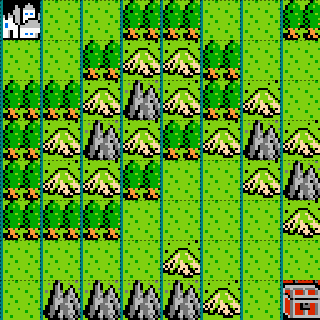

<function __main__.run_algo>

In [13]:
IMPASSABLE = -1

'''
s = source
t = target
g = grass
f = forest
h = hill
m = mountain
w = wall
'''
map_1 = [['s','g','g','f','f','g','g','f'],
         ['g','g','f','h','h','f','g','g'],
         ['f','f','h','m','h','f','h','g'],
         ['f','h','m','h','f','h','m','h'],
         ['f','h','h','f','g','g','h','m'],
         ['f','f','f','g','g','g','g','h'],
         ['g','g','g','g','h','g','g','g'],
         ['g','m','m','m','m','h','g','t']]

map_2 = [['s','g','g','f','f','g','g','f'],
         ['g','g','f','h','h','f','g','g'],
         ['f','f','h','m','h','f','h','g'],
         ['f','h','m','h','f','h','m','h'],
         ['f','h','h','f','g','f','h','m'],
         ['f','f','f','g','g','g','g','h'],
         ['g','g','g','g','h','g','g','g'],
         ['g','m','m','m','m','h','g','t']]

maps = [map_1, map_2]
map_files = ['small_map1.png', 'small_map2.png']

def build_map(graph):
    legend = {'g':1, 'f':2, 'h':3, 'm':4, 'w':float('inf')}
    source = [0,0]
    target = [len(graph)-1, len(graph[0])-1]
    grid = [[1 for col in range(len(graph[row]))] for row in range(len(graph))]
    for row in range(len(graph)):
        for col in range(len(graph[0])):
            if graph[row][col] == 's':
                source = [row,col]
            elif graph[row][col] =='t':
                target = [row,col]
            else:
                grid[row][col] = legend[graph[row][col]]
    return source, target, grid
            

directions = [[-1, 0 ], # Up
             [ 0, -1],  # Left
             [ 1, 0 ],  # Down
             [ 0, 1 ]]  # Right

policy_values = ["^", # Up 
                 "<", # Left
                 "V", # Down
                 ">"] # Right

END_ON_TARGET = False

def dijkstra(graph, source, target):
    q = build_q(graph)
    prev = [['X' for col in range(len(graph[row]))] for row in range(len(graph))]
    dist = [[float('inf') for col in range(len(graph[row]))] for row in range(len(graph))]
    dist[source[0]][source[1]] = 0
    prev[target[0]][target[1]] = 'O'
    
    while len(q) > 0:
        # Find vertex with minimum distance
        u = min_dist(dist, q)
        # Check to see if target
        if END_ON_TARGET and u == target:
            print("Ending early")
            return dist, prev
        # Remove vertex from q
        q.remove(u)
        # Check neighbors
        for i in range(len(directions)):
            v_row = u[0] + directions[i][0]
            v_col = u[1] + directions[i][1]
            if [v_row, v_col] in q:
                alt = dist[u[0]][u[1]] + graph[v_row][v_col]
                if alt < dist[v_row][v_col]:
                    dist[v_row][v_col] = alt
                    prev[v_row][v_col] = i
    return dist, prev
            
            
def min_dist(dist, q):
    min_v = q[0]
    min_dist = float('inf')
    for v in q:
        if dist[v[0]][v[1]] < min_dist:
            min_v = v
            min_dist = dist[v[0]][v[1]]
    return min_v

def build_q(graph):
    q = []
    for row in range(len(graph)):
        for col in range(len(graph[0])):
            if graph[row][col] != IMPASSABLE:
                q.append([row, col])
    return q                  

def build_path(prev, source, target):
    path = [[' ' for col in range(len(prev[row]))] for row in range(len(prev))]
    row = target[0]
    col = target[1]
    path[row][col] = '*'
    while row != source[0] or col != source[1]:
        new_row = row - directions[prev[row][col]][0]
        new_col = col - directions[prev[row][col]][1]
        path[new_row][new_col] = policy_values[prev[row][col]]
        row = new_row
        col = new_col
    return path
    
def print_grid(name, grid):
    print(name + ": ")
    for row in grid:
        print(row)
    print()

from IPython.display import display, Image

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
    
def run_algo(map_select):
    source, target, graph = build_map(maps[map_select-1])
    dist, prev = dijkstra(graph, source, target)
    path = build_path(prev, source, target)
    print_grid("Path", path),
    display(Image(filename='./images/' + map_files[map_select-1]))
    

interact(run_algo, map_select=(1,2))